In [7]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## KNN's Limitation

In [2]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [3]:
train_input, test_input, train_target, test_target = \
    train_test_split(perch_length, perch_weight, random_state=1234)

train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


In [4]:
knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(train_input, train_target)

print(knr.score(train_input, train_target).round(4))
print(knr.score(test_input, test_target).round(4))

0.9789
0.9784


In [5]:
print(knr.predict([[50]]).round(4))

[1000.]


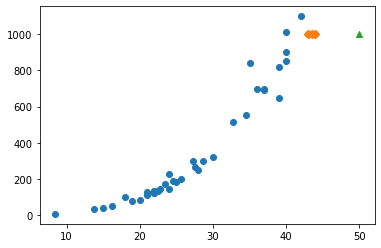

In [8]:
distances, indexes = knr.kneighbors([[50]])

plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
plt.scatter(50, knr.predict([[50]]), marker='^')

plt.show()

In [9]:
print(train_target[indexes].mean().round(4))

1000.0


In [10]:
print(knr.predict([[100]]).round(4))
print(knr.predict([[200]]).round(4))
print(knr.predict([[300]]).round(4))

[1000.]
[1000.]
[1000.]


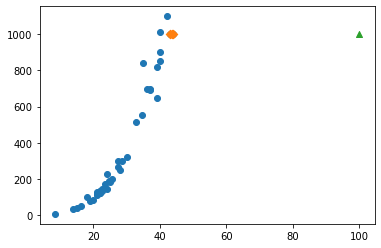

In [11]:
distances, indexes = knr.kneighbors([[100]])

plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
plt.scatter(100, knr.predict([[100]]), marker='^')
plt.show()

## Intro to Linear Regression

In [12]:
lr = LinearRegression()
lr.fit(train_input, train_target)

print(lr.score(train_input, train_target).round(4))
print(lr.score(test_input, test_target).round(4))

0.9108
0.9408


In [13]:
print(lr.predict([[50]]).round(4))

[1181.4704]


In [14]:
print('Slope:', lr.coef_[0].round(4))
print('Intercept:', lr.intercept_.round(4))

Slope: 36.0134
Intercept: -619.1994


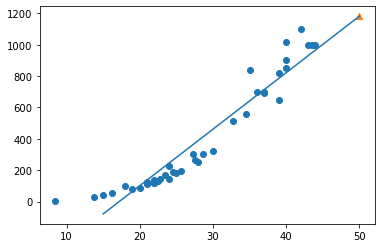

In [15]:
plt.scatter(train_input, train_target)
plt.plot([15, 50], [15 * lr.coef_[0] + lr.intercept_, 50 * lr.coef_[0] + lr.intercept_])
plt.scatter(50, lr.predict([[50]]), marker='^')

plt.show()

## Polynomial Regression

In [19]:
train_input_poly = np.column_stack((train_input ** 2, train_input))
test_input_poly = np.column_stack((test_input ** 2, test_input))

In [20]:
print(train_input_poly.shape, test_input_poly.shape)

(42, 2) (14, 2)


In [21]:
lr = LinearRegression()
lr.fit(train_input_poly, train_target)

print(lr.score(train_input_poly, train_target))
print(lr.score(test_input_poly, test_target))

0.9671986172059873
0.9881283580971195


In [22]:
print(lr.predict([[50 ** 2, 50]]))

[1538.33741443]


In [23]:
print(lr.coef_.round(4))
print(lr.intercept_.round(4))

[  0.972  -19.8915]
103.0324


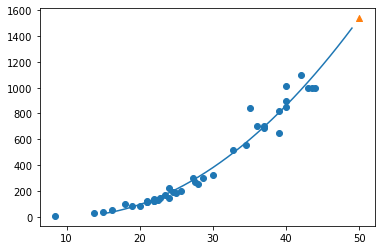

In [24]:
points = np.arange(15, 50, 1)

plt.scatter(train_input, train_target)
plt.plot(points, lr.coef_[0] * points ** 2 + lr.coef_[1] * points + lr.intercept_)
plt.scatter(50, lr.predict([[50 ** 2, 50]]), marker='^')

plt.show()